# Projet analyse de sentiment twitter


## Objectif 
Identifier les sentiments exprimés dans les tweets (positif, négatif, neutre), et fournir des statistiques descriptives ainsi qu’une modélisation prédictive pertinente

## 1. Importation et exploration des données

### 1-1-Charger les bibiothèque et Données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy

In [9]:
df = pd.read_csv('dataset.csv', encoding='latin1') 

df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [10]:
df.dtypes

0                                                                                                                       int64
1467810369                                                                                                              int64
Mon Apr 06 22:19:45 PDT 2009                                                                                           object
NO_QUERY                                                                                                               object
_TheSpecialOne_                                                                                                        object
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [14]:
df.shape

(1599999, 6)

In [16]:
# Aperçu des colonnes et premières lignes
df.head(), df.columns

(   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
 0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
 1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
 2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
 3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
 4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   
 
   @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
 0  is upset that he can't update his Facebook by ...                                                                   
 1  @Kenichan I dived many times for the ball. Man...                                                                   
 2    my whole body feels itchy and like its on fire                                                                    
 3  @nationwideclass no, it's not behaving at all...

### 2-Nettoyage & préparation

#### 2-1-Renommer les colonnes proprement

In [18]:
# Renommer les colonnes pour plus de clarté
df.columns = ['sentiment', 'tweet_id', 'created_at', 'query', 'user', 'text']

In [19]:
df

,sentiment,tweet_id,created_at,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [20]:
# Garder uniquement les colonnes utiles
df = df[['sentiment', 'created_at', 'user', 'text']]

In [21]:
df

,sentiment,created_at,user,text
0,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...
1599994,4,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Nous avons conservé les colonnes utiles :

- sentiment : 0 = négatif, 4 = positif (pas de neutre ici)

- created_at : date du tweet

- user : nom de l'utilisateur

- text : contenu du tweet

In [22]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [23]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MINDZIE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MINDZIE\AppData\Roaming\nltk_data...


True

In [24]:
# Nettoyage de texte
def clean_text(text):
    text = re.sub(r"http\S+|@\w+|#\w+|RT", "", text)  # Supprimer URLs, mentions, hashtags, RT
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())  # En minuscules et suppression ponctuation
    tokens = text.split()
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [25]:
# Application du nettoyage
df["clean_text"] = df["text"].astype(str).apply(clean_text)

# Conversion date
df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")

# Mapping du sentiment
df["sentiment"] = df["sentiment"].map({0: "négatif", 4: "positif"})

C:\Users\MINDZIE\AppData\Local\Temp\ipykernel_22316\207486549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df["text"].astype(str).apply(clean_text)
C:\Users\MINDZIE\AppData\Local\Temp\ipykernel_22316\207486549.py:5: FutureWarning: Parsed string "Mon Apr 06 22:19:49 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")
C:\Users\MINDZIE\AppData\Local\Temp\ipykernel_22316\207486549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [26]:
# Vérification
df.head()

,sentiment,created_at,user,text,clean_text
0,négatif,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
1,négatif,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
2,négatif,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,négatif,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see
4,négatif,2009-04-06 22:20:00,joy_wolf,@Kwesidei not the whole crew,whole crew


In [27]:
df.dtypes

sentiment             object
created_at    datetime64[ns]
user                  object
text                  object
clean_text            object
dtype: object

 ### 3-Analyse descriptive

In [29]:
df.describe()

,created_at
count,1599999
mean,2009-05-31 07:26:27.994492416
min,2009-04-06 22:19:49
25%,2009-05-28 23:01:17.500000
50%,2009-06-02 03:08:55
75%,2009-06-15 05:21:43.500000
max,2009-06-25 10:28:31


pas de sens 

Text(0.5, 1.0, 'Répartition des sentiments')

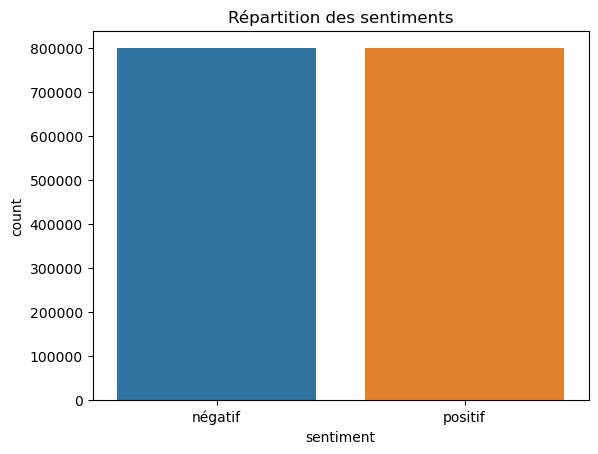

In [30]:
# Distribution des sentiments
sns.countplot(x="sentiment", data=df)
plt.title("Répartition des sentiments")

Text(0.5, 1.0, 'Longueur des tweets selon le sentiment')

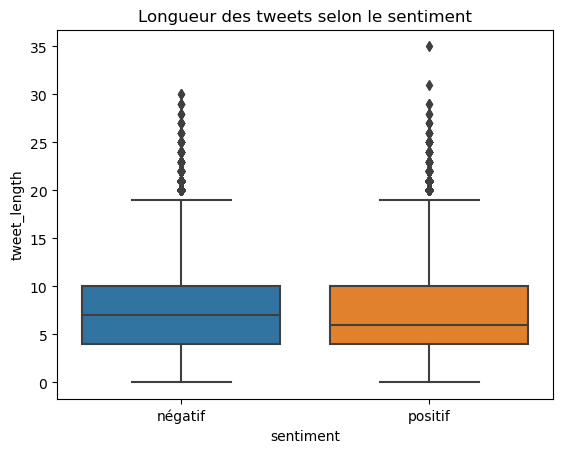

In [31]:
# Longueur des tweets
df["tweet_length"] = df["clean_text"].apply(lambda x: len(x.split()))
sns.boxplot(x="sentiment", y="tweet_length", data=df)
plt.title("Longueur des tweets selon le sentiment")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution des tweets par heure')

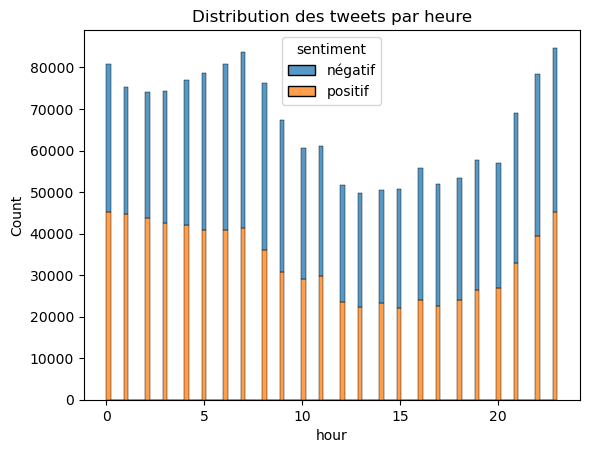

In [32]:
# Tweets par heure
df["hour"] = df["created_at"].dt.hour
sns.histplot(data=df, x="hour", hue="sentiment", multiple="stack")
plt.title("Distribution des tweets par heure")

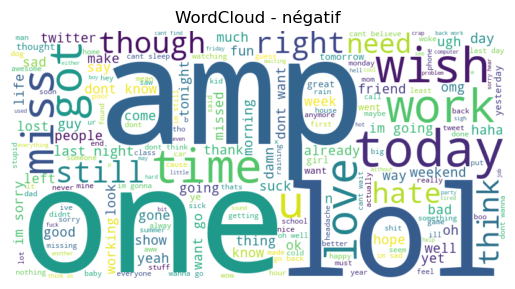

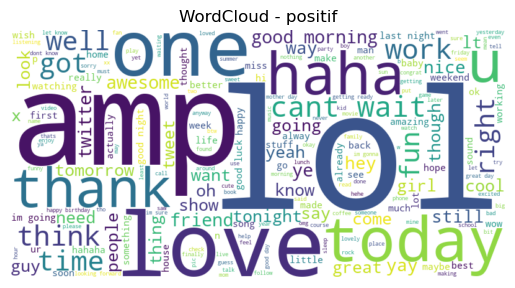

In [34]:
from wordcloud import WordCloud

for sentiment in df["sentiment"].unique():
    text = " ".join(df[df["sentiment"] == sentiment]["clean_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud - {sentiment}")
    plt.show()

###  4-Modélisation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [36]:
X = df["clean_text"]
y = df["sentiment"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [41]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     négatif       0.79      0.75      0.77    159494
     positif       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.78      0.77      0.77    320000
weighted avg       0.78      0.77      0.77    320000



In [44]:
pd.crosstab(y_test, y_pred, rownames=['Reel'], colnames=['Prediction'], margins=True)

precision,négatif,positif,All
Reel,,,
négatif,120084,39410,159494
positif,32724,127782,160506
All,152808,167192,320000


### 4-1-Matrice de confusion

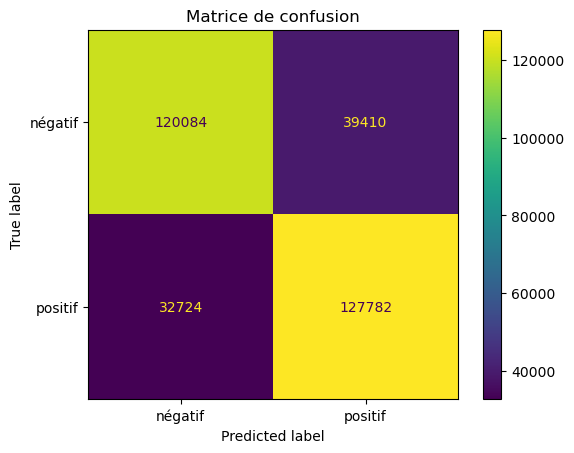

In [45]:
ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test)
plt.title("Matrice de confusion")
plt.show()